In [25]:
#import libraries  
import pathlib

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
#Tensorflow is a google AI framework
import tensorflow as tf
#Keras is a DeepLearning API for Tensorflow
from tensorflow import keras
from tensorflow.keras import layers

In [26]:
#Import dataset
column_names = ['CLL','NDVI','CVI','GNDVI','NRVI3','NRVI','RVI','GCI']
raw_dataset = pd.read_csv('./data_raw.csv',names=column_names,
                          na_values = "?", sep=",", skipinitialspace=True)
dataset = raw_dataset.copy()
dataset.head()

,CLL,NDVI,CVI,GNDVI,NRVI3,NRVI,RVI,GCI
0,114.51,0.227151,1.458211,0.519744,0.011720,0.227151,1.589461,1.519888
1,111.03,0.232475,1.504808,0.550758,0.012564,0.232475,1.607123,1.550893
2,117.61,0.227241,1.433650,0.505362,0.011734,0.227241,1.589634,1.505504
3,103.48,0.229360,1.445648,0.515255,0.012066,0.229360,1.596564,1.515392
4,132.56,0.228474,1.515317,0.550987,0.011926,0.228474,1.593706,1.551143


In [27]:
#Verify NaN data
dataset.isna().sum()

CLL      0
NDVI     0
CVI      0
GNDVI    0
NRVI3    0
NRVI     0
RVI      0
GCI      0
dtype: int64

In [28]:
#Clean data (in this case is optional XD)
dataset = dataset.dropna()

In [29]:
#Divide th dataset into training and tests (80% for training process and 20% for evaluation)
train_dataset = dataset.sample(frac=0.9,random_state=0)
test_dataset = dataset.drop(train_dataset.index)
test_dataset.tail()

,CLL,NDVI,CVI,GNDVI,NRVI3,NRVI,RVI,GCI
174,137.03,0.237050,1.631462,0.621582,0.013320,0.237050,1.624381,1.621785
188,121.15,0.227241,1.475482,0.535967,0.011734,0.227241,1.589634,1.505504
190,153.46,0.231170,1.399699,0.494203,0.012354,0.231170,1.603164,1.494366
192,121.15,0.231772,1.475482,0.535967,0.012450,0.231772,1.604709,1.536103
195,126.78,0.229651,1.547861,0.569637,0.012112,0.229651,1.598648,1.569809


In [30]:
#View general data about train_data_set
train_stats = train_dataset.describe()
train_stats.pop("CLL")
train_stats = train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
NDVI,181.0,0.231310,0.003280,0.224126,0.228474,0.231170,0.233214,0.238489
CVI,181.0,1.481196,0.072231,1.311795,1.420466,1.480338,1.541093,1.641889
GNDVI,181.0,0.537421,0.040919,0.445593,0.504737,0.537392,0.568191,0.627462
NRVI3,181.0,0.012378,0.000525,0.011258,0.011926,0.012344,0.012684,0.013565
NRVI,181.0,0.231339,0.003281,0.224126,0.228474,0.231170,0.233214,0.238489
RVI,181.0,1.603304,0.011200,1.579154,1.593739,1.603164,1.609195,1.627838
GCI,181.0,1.537198,0.040866,1.445773,1.504873,1.536348,1.568373,1.627633


In [31]:
#Select the target label
train_labels = train_dataset.pop('CLL')
test_labels = test_dataset.pop('CLL')
train_labels.head()

18     108.87
170    128.44
107    133.44
98     154.26
177    117.72
Name: CLL, dtype: float64

In [32]:
#Build a model -- MLP secuential model with 2 layers
def build_model():
  model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=[len(train_dataset.keys())]),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
  ])

  optimizer = tf.keras.optimizers.RMSprop(0.001)

  model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse'])
  return model


In [33]:
#Build
model = build_model()

In [34]:
#Resume 
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 64)                512       
_________________________________________________________________
dense_7 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 65        
Total params: 4,737
Trainable params: 4,737
Non-trainable params: 0
_________________________________________________________________


In [35]:
train_dataset= train_dataset.astype('float32')
train_labels = train_labels.astype('float32')
train_dataset.head()

,NDVI,CVI,GNDVI,NRVI3,NRVI,RVI,GCI
18,0.232524,1.530841,0.563897,0.012572,0.232524,1.607222,1.564029
170,0.229108,1.526880,0.565249,0.012026,0.229108,1.608328,1.565398
107,0.231111,1.536267,0.566210,0.012344,0.231111,1.602632,1.536348
98,0.227663,1.444008,0.512362,0.011800,0.227663,1.591750,1.512519
177,0.234308,1.447912,0.517434,0.012195,0.234308,1.599280,1.517603


In [36]:

#Train model
EPOCHS = 1000

history = model.fit(
  train_dataset, train_labels,
  epochs=EPOCHS, validation_split = 0.2, verbose=0,)


In [37]:
#Show train stadisticts from history object
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,mae,mse,val_loss,val_mae,val_mse,epoch
995,179.036545,10.872066,179.036545,204.384354,11.046153,204.384354,995
996,178.907654,10.873650,178.907654,216.079575,11.298914,216.079575,996
997,181.706726,10.918897,181.706726,202.624313,11.003023,202.624313,997
998,180.030792,10.896889,180.030792,214.084595,11.264371,214.084595,998
999,180.856003,10.886783,180.856003,206.395294,11.102128,206.395294,999


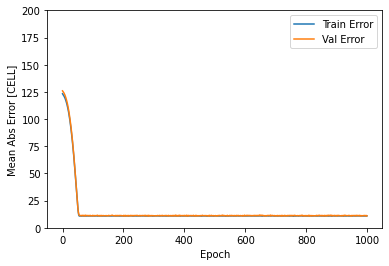

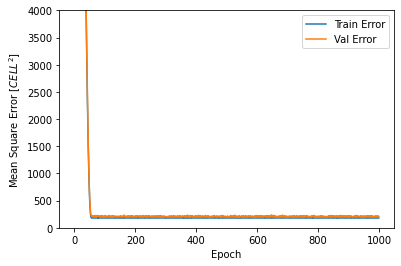

In [38]:
#Plot training and value error
def plot_history(history):
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch

  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Abs Error [CELL]')
  plt.plot(hist['epoch'], hist['mae'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mae'],
           label = 'Val Error')
  plt.ylim([0,200])
  plt.legend()

  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Square Error [$CELL^2$]')
  plt.plot(hist['epoch'], hist['mse'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mse'],
           label = 'Val Error')
  plt.ylim([0,4000])
  plt.legend()
  plt.show()


plot_history(history)

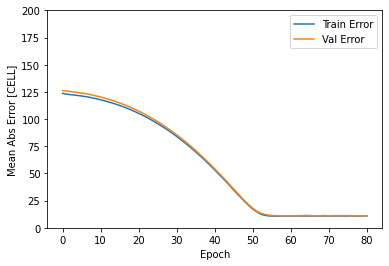

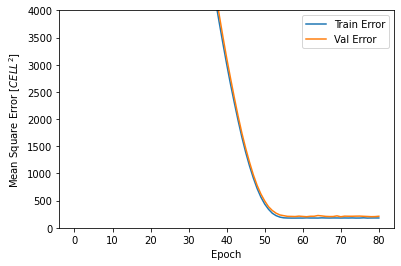

In [39]:
#Improve model with early stopping strategy
model = build_model()

# The patience parameter is the amount of epochs to check for improvement
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

history = model.fit(train_dataset, train_labels, epochs=EPOCHS,
                    validation_split = 0.2, verbose=0, callbacks=[early_stop])

plot_history(history)

In [41]:
#Evaluate model using data tes
loss, mae, mse = model.evaluate(test_dataset, test_labels, verbose=2)

print("Testing set Mean Abs Error: {:5.2f} CELL".format(mae))

1/1 - 0s - loss: 285.0457 - mae: 12.1724 - mse: 285.0457
Testing set Mean Abs Error: 12.17 CELL


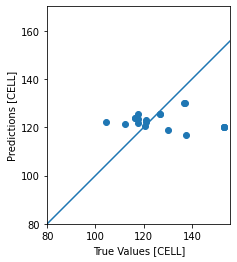

In [42]:
test_predictions = model.predict(test_dataset).flatten()

plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [CELL]')
plt.ylabel('Predictions [CELL]')
plt.axis('equal')
plt.axis('square')
plt.xlim([80,plt.xlim()[1]])
plt.ylim([80,plt.ylim()[1]])
_ = plt.plot([0, 200], [0, 200])

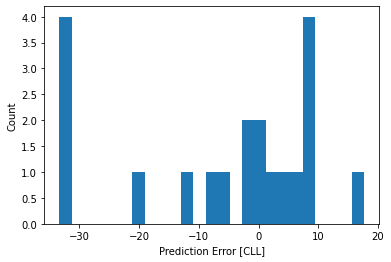

In [43]:
#Show error distribution
error = test_predictions - test_labels
plt.hist(error, bins = 25)
plt.xlabel("Prediction Error [CLL]")
_ = plt.ylabel("Count")

In [ ]:
#It is not entirely Gaussian, but we could expect that because the number of samples is very small.  XD
#Maybe with synthetic data and more training epoch we obtain a reasonable improvement 